#  Catalogs Self-Calibration

---
**License**

 Catalogs Self-Calibration

 Sat Jul 7 11:00:00 2025\
 Copyright  2025\
 Cinthia Nunes de Lima <cinthia.n.lima@uel.br> \ Henique Cardoso Naves Lettieri <henrique.cnl23@uel.br> \ Sandro Dias Pinto Vitenti <vitenti@uel.br>

---
---
 catalogs_selfcalibration\
 Copyright (C) 2025 Cinthia Nunes de Lima <cinthia.n.lima@uel.br>, Henrique Cardoso Naves Lettieri <henrique.cnl23@uel.br>, Sandro Dias Pinto Vitenti <vitenti@uel.br>

 numcosmo is free software: you can redistribute it and/or modify it
 under the terms of the GNU General Public License as published by the
 Free Software Foundation, either version 3 of the License, or
 (at your option) any later version.

 numcosmo is distributed in the hope that it will be useful, but
 WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
 See the GNU General Public License for more details.

 You should have received a copy of the GNU General Public License along
 with this program.  If not, see <http://www.gnu.org/licenses/>.
 
---

## Libraries & Configs

In [1]:
import sys
sys.path.insert(0, "/global/homes/l/lettieri/NumCosmo/notebooks/richness_proxy/")
sys.path.insert(0, "/global/homes/l/lettieri/NumCosmo/notebooks/richness_proxy/ESMCMC")

from esmcmc_rm_relation_script import catalog_fit, esmcmc

#NumCosmo
from numcosmo_py import Ncm, Nc, GObject
Ncm.cfg_init()
Ncm.cfg_set_log_handler(lambda msg: sys.stdout.write(msg) and sys.stdout.flush())

#Useful packages
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

import matplotlib as mpl


#GCR Catalogs
sys.path.insert(0, "/global/homes/l/lettieri/gcrcatalogs-new/gcr-catalogs")
sys.path.insert(0, "/global/homes/l/lettieri/gcr-catalogs")
sys.path.insert(0, "/global/homes/l/lettieri/")
sys.path.insert(0, "/global/homes/l/lettieri/NumCosmo/notebooks/richness_proxy/CatalogsMatching/")
import GCRCatalogs
GCRCatalogs.set_root_dir_by_site("nersc")

#Corner plots 
from getdist import plots
from getdist.mcsamples import  MCSamples
import getdist
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

import pygtc
from IPython.display import display, Math
%matplotlib inline

GetDist Version: 1.5.3, Matplotlib version: 3.10.0


## Data

In [10]:
#id_data = Table.read('/global/homes/l/lettieri/NumCosmo/notebooks/richness_proxy/CatalogsMatching/match_ID.fits')
proximity_data = Table.read('/global/homes/l/lettieri/NumCosmo/notebooks/trend/match_proximity.fits')
#clevar_data = Table.read('/global/homes/l/lettieri/NumCosmo/notebooks/richness_proxy/CatalogsMatching/match_clevar.fits')

id_data = Table.read('/global/homes/l/lettieri/NumCosmo/notebooks/trend/match_proximity.fits')
proximity_data = Table.read('/global/homes/l/lettieri/NumCosmo/notebooks/trend/match_proximity.fits')
clevar_data = Table.read('/global/homes/l/lettieri/NumCosmo/notebooks/trend/match_proximity.fits')

#id_data['halo_mass'].name = 'mass'
#clevar_data['halo_mass'].name = 'mass'
proximity_data['R'].name = 'richness'
proximity_data['z'].name = 'redshift'

id_data['R'].name = 'richness'
id_data['z'].name = 'redshift'

clevar_data['R'].name = 'richness'
clevar_data['z'].name = 'redshift'


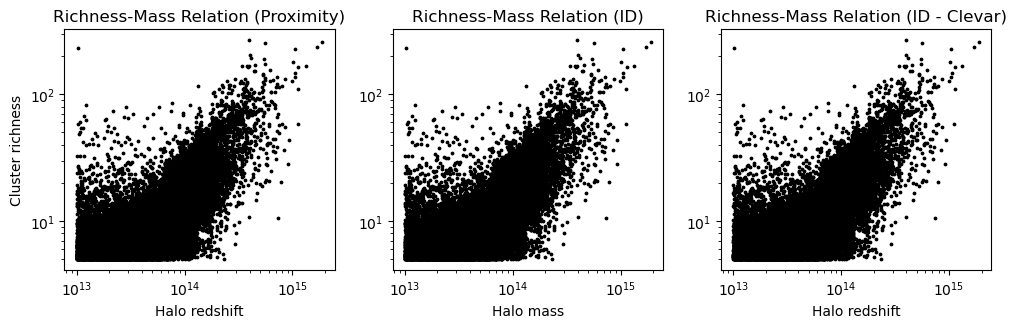

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(10,3))
fig.tight_layout() 

axs[0].scatter(proximity_data['mass'], proximity_data['richness'], c= 'k', s=3)
axs[0].set_ylabel('Cluster richness')
axs[0].set_xlabel('Halo redshift')
axs[0].set_title('Richness-Mass Relation (Proximity)')
axs[0].set_yscale('log')
axs[0].set_xscale('log')

axs[1].scatter(id_data['mass'], id_data['richness'], c= 'k', s=3)
axs[1].set_xlabel('Halo mass')
axs[1].set_title('Richness-Mass Relation (ID)')
axs[1].set_yscale('log')
axs[1].set_xscale('log')

axs[2].scatter(clevar_data['mass'], clevar_data['richness'], c= 'k', s=3)
axs[2].set_xlabel('Halo redshift')
axs[2].set_title('Richness-Mass Relation (ID - Clevar)')
axs[2].set_yscale('log')
axs[2].set_xscale('log')

plt.show()

## MCMC

In [12]:
N_WALKERS = 1200
N_RUN = 400

In [13]:
# esmcmc(id_data, 5, N_WALKERS, N_RUN, 'asc', 'id.fits')

In [14]:
# esmcmc(clevar_data, 5, N_WALKERS, N_RUN, 'asc', 'id_clevar.fits')

In [15]:
# esmcmc(proximity_data, 5, N_WALKERS, N_RUN, 'asc', 'proximity.fits')

In [ ]:
N_WALKERS1 = 1200
BURNIN1 = 75
mcat1 = Ncm.MSetCatalog.new_from_file_ro('id.fits', N_WALKERS1 * 75)
mset1 = mcat1.get_mset()

mcat2 = Ncm.MSetCatalog.new_from_file_ro('id_clevar.fits', N_WALKERS1 * 75)
mset2 = mcat2.get_mset()

mcat3 = Ncm.MSetCatalog.new_from_file_ro('proximity.fits', N_WALKERS1 * 70)
mset3 = mcat3.get_mset()

In [ ]:
mset1.pretty_log()

In [ ]:
mset2.pretty_log()

In [ ]:
mset3.pretty_log()

In [ ]:
lnM_v = Ncm.Vector.new(len(id_data))
z_v = Ncm.Vector.new(len(id_data))
rich_v = Ncm.Vector.new(len(id_data))
    
for i, mass in enumerate(id_data['mass']):
    lnM_v.set(i, np.log(mass))
    
for i, z in enumerate(id_data['redshift']):
    z_v.set(i, z)
    
for i, rich in enumerate(id_data['richness']):
    rich_v.set(i, np.log(rich))
    
dmr = Nc.DataClusterMassRich.new()
dmr.set_data(lnM_v, z_v, rich_v)
   
# Dataset
    
dset = Ncm.Dataset.new()
dset.append_data(dmr)

# Likelihood
    
lh = Ncm.Likelihood.new(dset)

dmr.m2lnL_val(mset1)
mset1.prepare_fparam_map()

fit = Ncm.Fit.factory( Ncm.FitType.NLOPT, "ln-neldermead", lh, mset1, Ncm.FitGradType.NUMDIFF_CENTRAL )
fit.log_info()
fit.run_restart(Ncm.FitRunMsgs.SIMPLE, 1.0e-3, 0.0, None, None)


In [ ]:
fit.fisher()